In [15]:
!wget https://ribsandburgers.com/au/wp-content/uploads/2019/03/2-angus-bacon-and-cheese.jpg

--2021-11-03 14:32:23--  https://ribsandburgers.com/au/wp-content/uploads/2019/03/2-angus-bacon-and-cheese.jpg
Resolving ribsandburgers.com (ribsandburgers.com)... 103.242.49.242
Connecting to ribsandburgers.com (ribsandburgers.com)|103.242.49.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58178 (57K) [image/jpeg]
Saving to: ‘2-angus-bacon-and-cheese.jpg’

2-angus-bacon-and-c 100%[===================>]  56.81K   306KB/s    in 0.2s    

2021-11-03 14:32:24 (306 KB/s) - ‘2-angus-bacon-and-cheese.jpg’ saved [58178/58178]



In [16]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [17]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [18]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/2-angus-bacon-and-cheese.jpg"
}

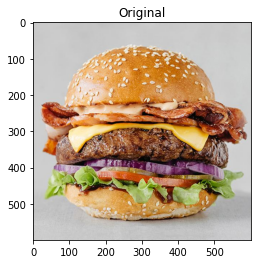

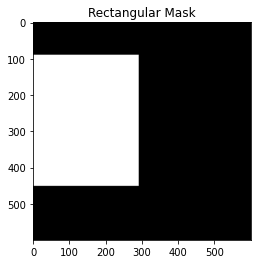

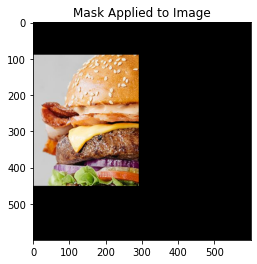

In [19]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

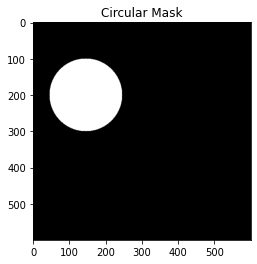

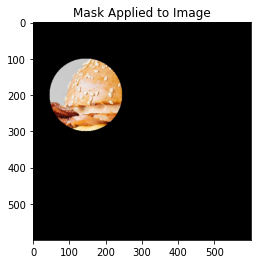

In [20]:
# now, let's make a circular mask with a radius of 100 pixels and
# apply the mask again
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)